In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
num_samples = 100000
x = np.linspace(0, 1, num_samples)
y = 2 * x + np.random.normal(0, 0.1, num_samples)  


x_train, x_test = x[:70000], x[70000:]
y_train, y_test = y[:70000], y[70000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model.compile(optimizer='sgd', loss='mse')
metrics = tf.metrics.BinaryAccuracy(threshold = 0)

model.fit(x_train, y_train, epochs=10, batch_size=16)

loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
4375/4375 [==============================] - 12s 3ms/step - loss: 0.0193
Epoch 2/10
4375/4375 [==============================] - 9s 2ms/step - loss: 0.0100
Epoch 3/10
4375/4375 [==============================] - 10s 2ms/step - loss: 0.0100
Epoch 4/10
4375/4375 [==============================] - 12s 3ms/step - loss: 0.0100
Epoch 5/10
4375/4375 [==============================] - 12s 3ms/step - loss: 0.0100
Epoch 6/10
4375/4375 [==============================] - 22s 5ms/step - loss: 0.0100
Epoch 7/10
4375/4375 [==============================] - 17s 4ms/step - loss: 0.0100
Epoch 8/10
4375/4375 [==============================] - 14s 3ms/step - loss: 0.0100
Epoch 9/10
4375/4375 [==============================] - 11s 3ms/step - loss: 0.0100
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0100
Test Loss: 0.009987561963498592


In [17]:
# Let us make one more exeperiment:

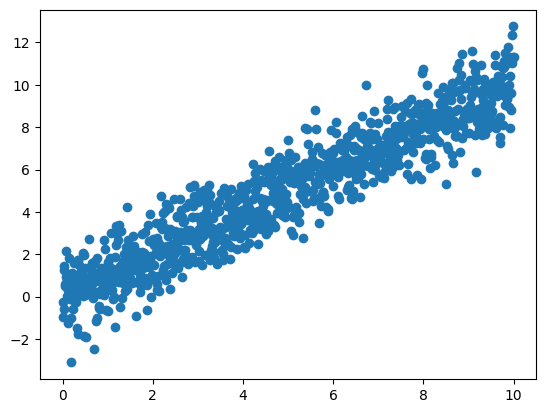

In [30]:
learning_rate = 0.01
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 1000)
y_train = x_train + np.random.normal(0,1,1000)

# plot of data
plt.scatter(x_train, y_train)

In [31]:
# declare weights
weight = tf.Variable(0.)
bias = tf.Variable(0.)

In [32]:
# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

In [33]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [34]:
# train model
for epoch in range(training_epochs):

# Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

# Get gradients
gradients = tape.gradient(loss, [weight,bias])
# Adjust weights
weight.assign_sub(gradients[0]*learning_rate)
bias.assign_sub(gradients[1]*learning_rate)

# Print output
print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")


Epoch count 99: Loss value: 34.80525207519531


In [37]:
print(weight.numpy())
print(bias.numpy())


0.6706715
0.100836605


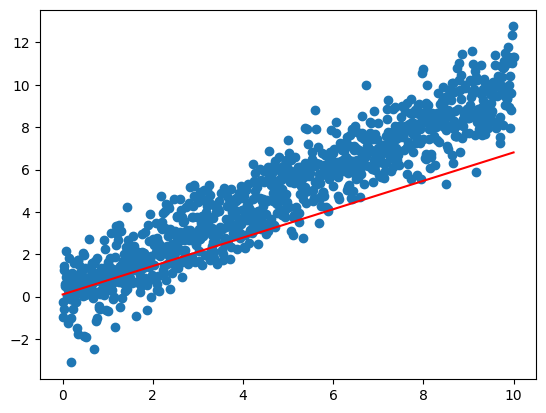

In [38]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()